<a href="https://colab.research.google.com/github/andrsbtrg/S9_ML/blob/main/s9_tensorflowtest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount your Google drive to access files:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Install dependencies

In [ ]:
!pip install tensorflow-gpu==2.0.0

     |████████████████████████████████| 380.8 MB 43 kB/s 
     |████████████████████████████████| 449 kB 46.0 MB/s 
     |████████████████████████████████| 3.8 MB 37.9 MB/s 
     |████████████████████████████████| 50 kB 6.8 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=62f6d39373a41ff35e33a2e07f3f62cd95bbe46f111fba46fc8df36382e1c3e5
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Succes

Run to check tensorflow works ⚡

In [ ]:
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6879233226322094714
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 7980722649056181511
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 7617504387834678384
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11338832282
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3871214443180001483
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]


Importing libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import json
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Function to load images

In [ ]:
def load_images(img_paths, target_size, interpolation='nearest', color_mode='rgb', normalize=False):
    images = []
    for img_path in img_paths:
        #load image
        img = keras.preprocessing.image.load_img(img_path, color_mode=color_mode, target_size=target_size, interpolation=interpolation)
        
        #convert to array
        img = keras.preprocessing.image.img_to_array(img)
        
        #normalize
        if normalize:
            img = img / 255
        
        #append
        images.append(img)
    
    images = np.stack(images, axis=0)
    
    return images

Loading the data:

Make sure that the path point to the specific folder "01_shapes_shuffled" inside the folder "dataset" in your drive



In [ ]:
#=======================
#LOAD DATA
#=======================
#PATHS

#current path
current_folder = Path.cwd()

#dataset path
dataset_path = current_folder.joinpath("/content/drive/MyDrive/s9_dataset/01_shapes_shuffled")
print(dataset_path)

/content/drive/MyDrive/s9_dataset/01_shapes_shuffled


Loading the images and the labels:

In [ ]:
#images path
img_paths = dataset_path.glob("*.png")

img_paths_list = []
for path in img_paths:
    path_str = str(path)
    img_paths_list.append(path_str)

# print(len(img_paths_list))
# print(img_paths_list[:10])

#list02 = [str(path) for path in img_paths]

#Load labels
labels_file = open("/content/drive/MyDrive/s9_dataset/labels_01_shapes_shuffled.json")
labels = json.load(labels_file)

labels = np.stack(labels, axis =0)
#---------------------
#LOAD IMAGES

# #load image
img = keras.preprocessing.image.load_img(img_paths_list[9], color_mode='grayscale', target_size=(28, 28), interpolation='bicubic') #normally we use "nearest", 
# print(type(img))
# print(img.size)

# #convert to array
img = keras.preprocessing.image.img_to_array(img)
# print(type(img))
#print(img.shape)

# #normalize
#img = img / 255

# #preview image
#plt.imshow(img)
images = load_images(img_paths_list, target_size=(28,28), interpolation='bicubic', color_mode='grayscale', normalize=True)

#-----------------------
#SPLIT DATA
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=40)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

#=======================
#ARTIFICIAL NEURAL NETWORK
#=======================

(224, 28, 28, 1) (56, 28, 28, 1)
(224,) (56,)




---
Architecture of the model


In [ ]:
ann_model = keras.Sequential([
                              # Input Layer
                              keras.layers.Flatten(input_shape = (28,28,1)),
                              # Hidden Layer
                              keras.layers.Dense(units=100, activation = 'relu'),
                              # Hidden Layer
                              keras.layers.Dense(units = 5, activation= 'softmax'),
])

Set the Optimizer

In [ ]:
ann_model.compile(optimizer = 'Adam',
                  loss = 'sparse_categorical_crossentropy',
                  metrics = ['accuracy'],
                  )

In [ ]:
# Summary

ann_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 505       
Total params: 79,005
Trainable params: 79,005
Non-trainable params: 0
_________________________________________________________________


Training

In [ ]:
model_history = ann_model.fit(x_train,y_train,epochs=100)

Train on 224 samples
Epoch 1/100
224/224 [==============================] - 1s 6ms/sample - loss: 2.0570 - accuracy: 0.1964
Epoch 2/100
224/224 [==============================] - 0s 131us/sample - loss: 1.7334 - accuracy: 0.1161
Epoch 3/100
224/224 [==============================] - 0s 147us/sample - loss: 1.6703 - accuracy: 0.1562
Epoch 4/100
224/224 [==============================] - 0s 166us/sample - loss: 1.6407 - accuracy: 0.2098
Epoch 5/100
224/224 [==============================] - 0s 140us/sample - loss: 1.6663 - accuracy: 0.2098
Epoch 6/100
224/224 [==============================] - 0s 122us/sample - loss: 1.6542 - accuracy: 0.2143
Epoch 7/100
224/224 [==============================] - 0s 146us/sample - loss: 1.6782 - accuracy: 0.1786
Epoch 8/100
224/224 [==============================] - 0s 141us/sample - loss: 1.6267 - accuracy: 0.2188
Epoch 9/100
224/224 [==============================] - 0s 143us/sample - loss: 1.6199 - accuracy: 0.2277
Epoch 10/100
224/224 [==============

Visualize epoch vs accuracy of the model

(0.0, 1.0)

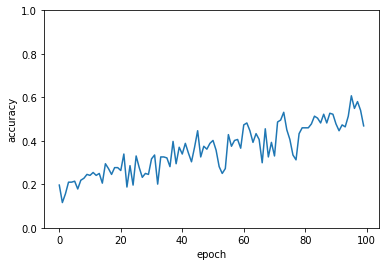

In [ ]:
plt.figure()
plt.plot(model_history.history['accuracy'],label='accuracy')
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.ylim([0,1])

---

Evaluate 



In [ ]:
ann_model.evaluate(x_test,y_test)

56/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.8929304395403181, 0.125]

Saving model

In [ ]:
ann_model.save('/content/drive/MyDrive/s9_dataset/saved_model/ann_model_01')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /content/drive/MyDrive/s9_dataset/saved_model/ann_model_01/assets


Loading model

In [ ]:
model_saved = keras.models.load_model('/content/drive/MyDrive/s9_dataset/saved_model/ann_model_01')
model_saved.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 505       
Total params: 79,005
Trainable params: 79,005
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_saved.evaluate(x_test,y_test)

56/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.8929304395403181, 0.125]

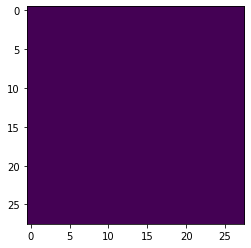

In [ ]:
img_zero = np.zeros(x_test[5].shape)
plt.figure()
plt.imshow(tf.squeeze(img_zero)) #using tf.squeeze on the image fixes the plt error

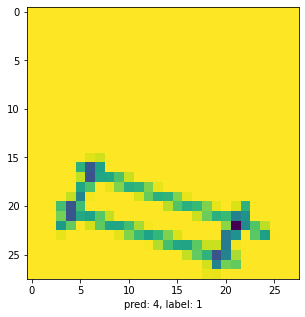

In [ ]:
def predict_image(x,y,img_index,model,label_list):
  # predict single image
  img = x[img_index]

  y_predict = model_saved.predict(x_test[5:6])
  y_predict_class = np.argmax(y_pred)
  y_predict_class = label_list[y_predict_class]

  # real label
  y_real = y[img_index]
  y_real = label_list[y_real]

  # plot
  plt.figure(figsize=(5,5))
  plt.imshow(tf.squeeze(img)) #squeeze the image before displaying
  plt.xlabel("pred: {}, label: {}".format(y_predict_class,y_real))


predict_image(x_test,y_test,1,model_saved,labels)